Martino Ischia, 28/5
<center> <h1>First report</h1> </center>

## Update
Il problema (come è ovvio che fosse) non è relativo ad un "lambda" ottimale.
La versione aggiornata ha sicuramente qualche problema, perché se lancio il codice con\

lambda = (a, b)\
e lambda = (b, a)\
ottengo due risultati diversi\
*working on it*

Carico il workspace dello script `Cshape.R` nel caso in cui sia installata fdaPDE di Kim e nel caso della mia versione aggiornata, che non è altro che la stessa libreria con tutte le interfacce aggiornate per essere compatibile con quella più recente (per fare un esempio, nella libreria più recente tutti i dati legati al calcolo del lambda migliore sono ora in `optimizationData` mentre prima erano in `regressionData`)

In [12]:
library(fdaPDE)
kim <- new.env()
load("D:/VM/Tesi/my/kim_version_output.RData", envir = kim)
updated <- new.env()
load("D:/VM/Tesi/my/updated_output.RData", envir = updated)

L'esempio 2D è quello con gli stessi dati della tesi di Kim: questa la mesh e queste le locations in verde

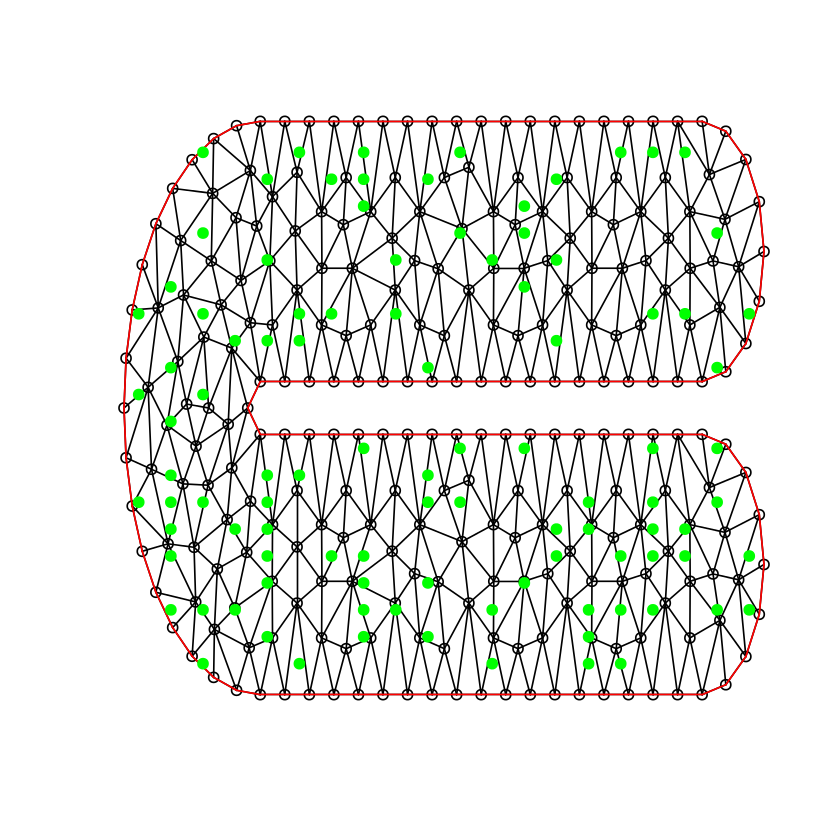

In [2]:
plot(updated$mesh)
points(updated$loc, pch = 19, col = 'green')

Come primo test mi limito a non aggiungere la componente random (l'epsilon) alle osservazioni, che sono quindi deterministiche

questi sono i beta esatti

In [3]:
updated$beta_exact1
updated$beta_exact2
updated$beta_exact3

[1] -2.0  0.5

[1] 3.0 0.5

[1] 8.0 0.5

I beta stimati da Kim (separati in effetto fisso, prima riga, e effetto misto, seconda)

In [4]:
kim$mod2_info$beta[, kim$mod2_info$bestlambda]
as.vector(kim$mod2_info$b_i[, kim$mod2_info$bestlambda])

[1] 2.9861177 0.5002474

[1] -4.9954618595 -0.0009160766  4.9963779361

I beta stimati da me (separati in effetto fisso, prima riga, e effetto misto, seconda)

In [5]:
updated$mod2_info$beta[, updated$mod2_info$bestlambda]
as.vector(updated$mod2_info$b_i[, updated$mod2_info$bestlambda])

[1] 2.9861177 0.5002474

[1] -4.9954618595 -0.0009160766  4.9963779361

Tuttavia si può notare che solo i beta del "best lambda" sono praticamente gli stessi, gli altri non coincidono

In [6]:
kim$mod2_info$beta - updated$mod2_info$beta

-8.881784e-16,0.003554084,0.0063775936,0.008521722,0.0100546561,0.0110566797,0.0116143878,0.0118149085,0.0117408581,0.0114664935,...,0.0056471300,0.0052770131,0.0049297483,0.0046060868,0.0043070066,0.0040334100,0.0037858383,0.0035642589,0.0033679589,0.0031955536
-1.110223e-16,-0.000267496,-0.0004775539,-0.000635660,-0.0007475923,-0.0008195616,-0.0008581647,-0.0008701723,-0.0008622134,-0.0008404342,...,-0.0005509086,-0.0005404811,-0.0005307849,-0.0005216164,-0.0005128339,-0.0005043426,-0.0004960817,-0.0004880122,-0.0004801068,-0.0004723414


qui plotto i campi spaziali stimati da kim e da me

In [7]:
options(rgl.useNULL=TRUE)

image(FEM(kim$mod2_info$fit.FEM.mixed$coeff[1:kim$mod2_info$fit.FEM.mixed$FEMbasis$nbasis,kim$mod2_info$bestlambda], kim$mod2_info$fit.FEM.mixed$FEMbasis))
rglwidget()
image(FEM(updated$mod2_info$fit.FEM.mixed$coeff[1:updated$mod2_info$fit.FEM.mixed$FEMbasis$nbasis,updated$mod2_info$bestlambda], updated$mod2_info$fit.FEM.mixed$FEMbasis))
rglwidget()

HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

Anche in questo caso sono identici, ma solo per il bestlambda. Proviamo ad esempio con un altro lambda. In realtà nel disegno non si distingue la differenza, ma sotto calcolo un errore relativo ed è anche intorno al 5% in alcuni casi

In [8]:
image(FEM(kim$mod2_info$fit.FEM.mixed$coeff[1:kim$mod2_info$fit.FEM.mixed$FEMbasis$nbasis,2], kim$mod2_info$fit.FEM.mixed$FEMbasis))
rglwidget()
image(FEM(updated$mod2_info$fit.FEM.mixed$coeff[1:updated$mod2_info$fit.FEM.mixed$FEMbasis$nbasis,2], updated$mod2_info$fit.FEM.mixed$FEMbasis))
rglwidget()

HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

In [11]:
head((kim$mod2_info$fit.FEM.mixed$coeff[1:kim$mod2_info$fit.FEM.mixed$FEMbasis$nbasis,2] -
updated$mod2_info$fit.FEM.mixed$coeff[1:updated$mod2_info$fit.FEM.mixed$FEMbasis$nbasis,2])/
updated$mod2_info$fit.FEM.mixed$coeff[1:updated$mod2_info$fit.FEM.mixed$FEMbasis$nbasis,2])


[1] -0.053904273 -0.027767646 -0.004657804  0.004173530  0.007385236
[6]  0.006772228

qui comparo una delle soluzioni ottimali trovate con la soluzione esatta nei punti di osservazione (usate il mouse per capire meglio)

In [9]:
fitted.function1 <- eval.FEM.mixed(kim$mod2_info$fit.FEM.mixed,
        locations = kim$loc)[, kim$mod2_info$bestlambda]
fitted.function2 <- eval.FEM.mixed(updated$mod2_info$fit.FEM.mixed,
        locations = updated$loc)[, updated$mod2_info$bestlambda]

plot3d(kim$loc[,1], kim$loc[,2] , fitted.function1[1:kim$nlocs])
points3d(kim$loc[,1], kim$loc[,2] , kim$func_evaluation1, col='red')
rglwidget()

HTML widgets cannot be represented in plain text (need html)